<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades · PAC2</p>
<p style="margin: 0; text-align:right;">2020-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 2: Mètodes no supervisats

Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques no supervisades 
així com algunes de les aplicacions reals:

 - **Clustering amb diferents estratègies**: k-means i regla del colze, basades en densitat i jeràrquiques.
 - **Optimització amb reducció de dimensionalitat**: t-SNE.
 - **Aplicació**: identificació de punts d'interés turístics.




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Nom i cognoms:</strong>
</div>

Pol Bieto Luengo

In [39]:
import geopandas as gpd
import pandas as pd

In [40]:
unitats_adms = gpd.read_file('0301100100_UNITATS_ADM_POLIGONS.json')
barris = unitats_adms[unitats_adms['TIPUS_UA']=='BARRI']
barris.to_file("barris.json", driver="GeoJSON")



### Eliminació de files duplicades

L'eliminació de files duplicades la portarem a terme en base a la variable link. Si tenim dues o més observacions 
del mateix pis de la web de Fotocasa, ens quedarem únicament amb la primera:


In [41]:
apartments = pd.read_csv('data_final.csv')
apartments.loc[apartments.duplicated('link')]


,Unnamed: 0,address,bathrooms,building_subtype,building_type,conservation_state,date,discount,floor_elevator,is_new_construction,...,link,longitude,price,realestate,realestate_id,rooms,sqft_m2,neighbourhood,id_neighbourhood,neighb_meanprice
39,39,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1,14.323614
40,40,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1,14.323614
41,41,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1,14.323614
42,42,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1,14.323614
43,43,"Carrer de Picalquers, El Raval",1,Apartment,Flat,NaN,2020-12-14,0,0,False,...,/es/alquiler/vivienda/barcelona-capital/el-rav...,2.168707,525.0,INVERSIONES INMOBILIARIAS Y FINANCIERAS SANT A...,9202758138526,0,35,el raval,1,14.323614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11803,11803,Sarrià,2,Attic,Flat,1.0,2020-12-14,200,1,False,...,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.121359,3700.0,Stipek Ferrer Premium Properties,9202765377715,4,280,sarrià,23,16.866645
11804,11804,Sarrià,2,Attic,Flat,1.0,2020-12-14,200,1,False,...,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.121359,3700.0,Stipek Ferrer Premium Properties,9202765377715,4,280,sarrià,23,16.866645
12007,12007,Sant Gervasi- Galvany,5,Flat,Flat,2.0,2020-12-14,0,1,False,...,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.141838,5300.0,Max Ricart,9202765879322,6,280,sant gervasi - galvany,26,15.275452
12061,12061,"Travessera de Gràcia, Sant Gervasi- Galvany",2,Apartment,Flat,NaN,2020-12-14,594,0,False,...,/es/alquiler/vivienda/barcelona-capital/aire-a...,2.147670,6073.0,Homelike,9202762567099,4,100,sant gervasi - galvany,26,15.275452


In [42]:
apartments = apartments.drop_duplicates('link')

### Neteja de dades

In [43]:

apartments = apartments.astype({
    'conservation_state': 'category',
    'building_subtype': 'category',
    'building_type': 'category',
    'floor_elevator': 'bool',
    'neighbourhood':'category',
    'id_neighbourhood':'category'
})
apartments.isna().sum()


Unnamed: 0                0
address                   0
bathrooms                 0
building_subtype          0
building_type             0
conservation_state     5340
date                      0
discount                  0
floor_elevator            0
is_new_construction       0
latitude                  0
link                      0
longitude                 0
price                     4
realestate              106
realestate_id             0
rooms                     0
sqft_m2                   0
neighbourhood             0
id_neighbourhood          0
neighb_meanprice          0
dtype: int64

Veiem que molts habitatges no tenen informació sobre l'estat de conservació. Omplirem amb -1 aquells que no en tinguin:



In [44]:
apartments['conservation_state'] = apartments['conservation_state'].cat.add_categories(-1)
apartments['conservation_state'] = apartments['conservation_state'].fillna(-1)

In [45]:
apartments = apartments.dropna(subset=['realestate'])
apartments = apartments.dropna(subset=['price'])
apartments.isna().sum()

Unnamed: 0             0
address                0
bathrooms              0
building_subtype       0
building_type          0
conservation_state     0
date                   0
discount               0
floor_elevator         0
is_new_construction    0
latitude               0
link                   0
longitude              0
price                  0
realestate             0
realestate_id          0
rooms                  0
sqft_m2                0
neighbourhood          0
id_neighbourhood       0
neighb_meanprice       0
dtype: int64

### Outliers

El que primer farem, serà visualitzar a gràfics de tipus boxplot cadascuna de les variables quantitatives per tal de determinar si tenim o no outliers:



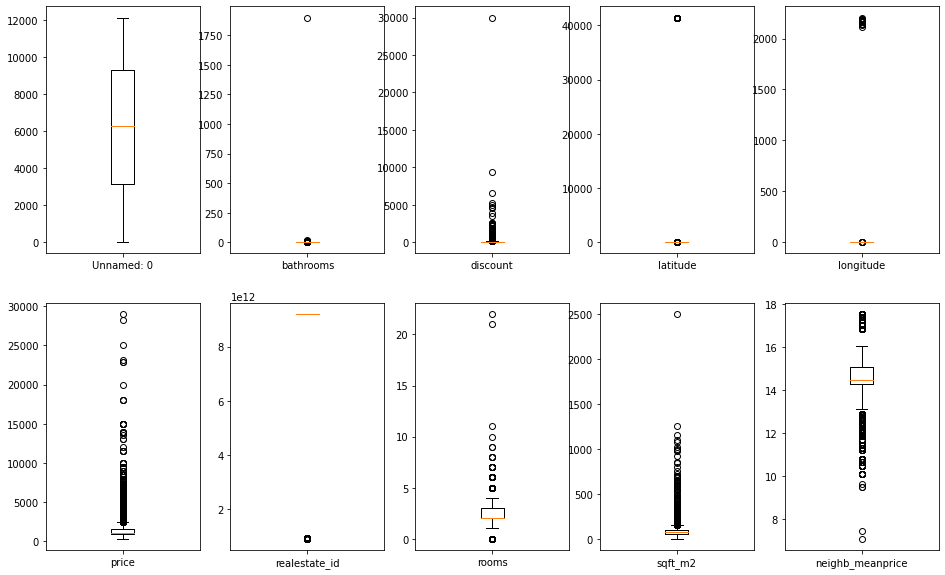

In [46]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import math

fig = plt.figure(figsize=(16,10))
numeric_attributes = apartments.select_dtypes(include=np.number).columns
for idx, column in enumerate(numeric_attributes):
    ax = fig.add_subplot(2, math.ceil(len(numeric_attributes)/2), idx+1)
    ax.boxplot(apartments[[column]], labels=[column])

Eliminem les que tinguin un descompte més elevat que el preu 

In [47]:
apartments = apartments[apartments.discount < apartments.price]
apartments = apartments[apartments.price < 10000]

Arreglem les dades de la longitud/latitud:

In [48]:
apartments.loc[apartments['latitude'] > 100, 'latitude'] = apartments['latitude']/1000
apartments.loc[apartments['longitude'] > 100, 'longitude'] = apartments['longitude']/1000

Arreglem les dades de bathroom:

In [49]:
apartments.bathrooms.max()

1901

In [50]:
apartments = apartments.drop(index=10875)
apartments.bathrooms.max()

8

In [51]:
apartments = apartments[apartments['sqft_m2'] != 0]

In [52]:
apartments.sqft_m2.min()

1

In [53]:
apartments = apartments[apartments.sqft_m2!=1]

### Transformació de dades

Afegirem una nova variable que calculi la diferència de cada habitatge sobre el preu mig del barri:



In [54]:
apartments['diff_mitjana'] = ((apartments['price']/(apartments.neighb_meanprice*apartments.sqft_m2))-1)*100
apartments['price_m2'] = apartments['price']/apartments['sqft_m2']
apartments['discount_m2'] = apartments['discount']/apartments['sqft_m2']

In [55]:
apartments[apartments.price_m2<5][['price','sqft_m2','price_m2']]

,price,sqft_m2,price_m2
3728,920.0,920,1.000000
7683,1250.0,1250,1.000000
8538,1375.0,280,4.910714
10130,1755.0,1025,1.712195
10775,2106.0,1150,1.831304


### Construïm les dades finals:

In [56]:
dades_barri = apartments.groupby(['id_neighbourhood']).mean()[['diff_mitjana','price','sqft_m2','discount','price_m2','discount_m2']]

dades_barri = dades_barri.reset_index()
dades_barri.rename(columns={'id_neighbourhood':'CODI_UA'}, inplace=True)
dades_barri

,CODI_UA,diff_mitjana,price,sqft_m2,discount,price_m2,discount_m2
0,1,18.188422,1046.520992,65.929389,59.543893,16.928854,1.000658
1,2,33.715622,1406.701843,81.169179,57.237856,19.119716,0.784394
2,3,23.942516,970.831050,47.214612,57.456621,21.566574,1.110614
3,4,23.772686,1315.672222,73.166667,54.420370,18.760633,0.793004
4,5,19.658284,1233.177083,78.088542,42.708333,16.770507,0.656541
...,...,...,...,...,...,...,...
65,69,30.804632,2368.282609,103.684783,55.695652,22.578878,0.583498
66,70,34.077455,1204.282051,78.461538,41.282051,15.204796,0.462336
67,71,9.168211,1306.915254,83.338983,33.796610,15.403945,0.430355
68,72,0.076791,892.181818,76.000000,13.848485,11.912984,0.180878


Modifiquem les dades de tecnocasa, ja que encara que sigui una franquícia, ens interesa agrupar els seus pisos:

In [57]:
apartments.loc[apartments.realestate.astype(str).str.contains('TECNOCASA'),'realestate'] = 'TECNOCASA'
apartments.loc[apartments.realestate.astype(str).str.contains('tecnocasa'),'realestate'] = 'TECNOCASA'
apartments.loc[apartments.realestate.astype(str).str.contains('TECNOCASA'),'realestate_id'] = '9999999999999'
realstate_by_neigh = apartments.groupby(['id_neighbourhood','realestate']).size()

In [58]:
realstate_by_neigh.max()

163

In [59]:
state_pcts = realstate_by_neigh.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

majoritary_realstate = state_pcts[state_pcts > 5]

In [60]:
dades_barri['CODI_UA'] = dades_barri['CODI_UA'].apply(np.int64)
dades_barri['CODI_UA'] = dades_barri['CODI_UA'].apply('{:0>2}'.format)

In [61]:
df  = barris.merge(dades_barri, on='CODI_UA', how='left')
gdf = gpd.GeoDataFrame(df)


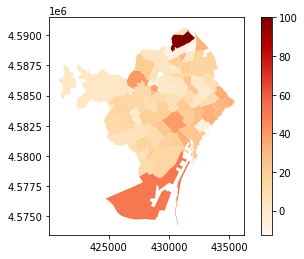

In [62]:
fig, ax = plt.subplots(1, 1)
#missing_kwds={"color": "lightgrey", "edgecolor": "red","hatch": "///","label": "Missing values",}
gdf.plot(column='diff_mitjana', cmap='OrRd', vmax=100, ax=ax, legend=True);

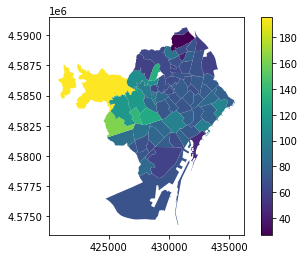

In [63]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='sqft_m2',ax=ax, legend=True);

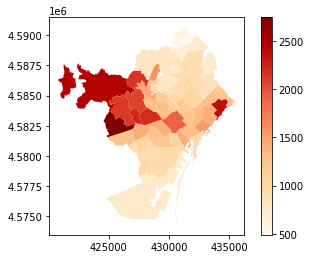

In [64]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='price', cmap='OrRd', ax=ax, legend=True);

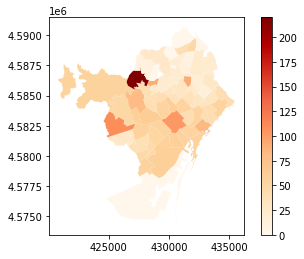

In [65]:
fig, ax = plt.subplots(1, 1)
gdf.plot(column='discount', cmap='OrRd', ax=ax, legend=True);

In [66]:
gdf.to_file("barris.geojson", driver='GeoJSON')

apartments.to_csv('data_final_id_clean.csv')

Canvi en el sistema de coordenades

In [67]:
!ogr2ogr -f GeoJSON -s_srs EPSG:25831 -t_srs "EPSG:4326" barris_marcator.geojson barris.geojson 

In [68]:
majoritary_realstate

id_neighbourhood  realestate                           
1                 AREA CASA                                 6.106870
                  ENGEL & VOELKERS                          5.343511
                  Homelike                                 12.404580
                  SH BARCELONA                              6.106870
2                 APROPERTIES REAL ESTATE Nº Aicat 6388     8.040201
                                                             ...    
73                NEXUUN                                    5.882353
                  SERVICHECK (VALLECAS)                     5.882353
                  SINLAND                                   5.882353
                  SOMOSCASA                                 5.882353
                  SPAI INMOBILIARIA                        11.764706
Length: 278, dtype: float64

In [92]:
realstate_count = apartments.groupby(['realestate','realestate_id']).agg(count=('realestate_id', 'size'), sqft_m2=('sqft_m2', 'mean'), price=('price', 'mean'), diff_mitjana=('diff_mitjana','mean'),discount=('discount', 'mean')).reset_index()

In [93]:
realstate_count

,realestate,realestate_id,count,sqft_m2,price,diff_mitjana,discount
0,EL DESPATX 97,9202753026573,4,70.75,800.000000,-11.049742,60.000000
1,Home Group Esquerra,9202765148846,1,98.00,950.000000,-33.243028,40.000000
2,NIU CAPITAL,9202764487854,4,115.00,1462.500000,-8.838338,87.500000
3,PATRIMON,9202753061242,1,100.00,1000.000000,-27.760485,100.000000
4,080 REAL ESTATE,9202756880405,21,73.00,1339.190476,32.317725,2.380952
...,...,...,...,...,...,...,...
1042,thomas matias,9202765802796,1,78.00,850.000000,-12.644943,0.000000
1043,tino,9202754831484,1,105.00,1500.000000,1.929180,0.000000
1044,tom,9202757905646,1,48.00,890.000000,22.328061,0.000000
1045,victor,9202752583112,1,60.00,850.000000,-1.095725,0.000000


In [95]:
realstate_count.sort_values('count')


,realestate,realestate_id,count,sqft_m2,price,diff_mitjana,discount
1046,xesco,9202753953159,1,65.000000,950.000000,0.648973,0.000000
768,Moira,9202752467883,1,38.000000,750.000000,37.792333,0.000000
406,FINQUES GIRONELLA,9202765454208,1,150.000000,1980.000000,-12.564024,0.000000
770,MªAngeles Félix,9202752734306,1,90.000000,1150.000000,-7.732108,0.000000
771,Máximo De Robles,9202765661744,1,45.000000,770.000000,13.342932,0.000000
...,...,...,...,...,...,...,...
58,AREA CASA,9202752570036,330,77.915152,1257.609091,16.275161,15.036364
896,SH BARCELONA,9202752325093,381,67.141732,1101.955381,21.018271,118.845144
52,APROPERTIES REAL ESTATE Nº Aicat 6388,9202753825457,475,109.507368,2021.610526,30.184262,77.640000
547,Homelike,9202762567099,750,69.725333,1865.925333,96.537155,62.065333


In [96]:
realstate_count[realstate_count.duplicated(subset=['realestate'])]

,realestate,realestate_id,count,sqft_m2,price,diff_mitjana,discount
86,Alberto,9202765763461,1,60.000000,900.000000,4.462427,0.0
161,CAFUR,9202764178856,15,62.266667,823.533333,-3.491361,17.0
518,Gerard,9202764751675,1,75.000000,890.000000,-11.445624,0.0
628,Joan,9202756080276,1,35.000000,780.000000,55.587229,0.0
632,Jorge,9202765194061,1,42.000000,500.000000,-16.887164,0.0
649,LA CASA AGENCY,9202756911676,2,85.500000,1000.000000,-15.847788,50.0
653,LA CASA GRUP,9202752835162,2,70.000000,837.500000,-9.664067,0.0
711,MARIA,9202756371350,1,90.000000,1200.000000,5.439668,0.0
744,Marc,9202765421399,1,75.000000,1300.000000,19.734391,0.0
745,Marc,9202765890794,1,37.000000,850.000000,32.025055,0.0


In [97]:
realstate_count.to_csv('counts_realstate.csv')